# 1.  Matrix Creation and Initial Operations

1.1 Part A: Matrix Initialization

In [350]:
import numpy as np 


In [351]:
A = np.random.randint(0,10,9).reshape(3,3)
A

array([[4, 9, 8],
       [1, 1, 7],
       [9, 9, 3]], dtype=int32)

In [352]:
B = np.random.randint(0,10,9).reshape(3,3)
B

array([[6, 7, 2],
       [0, 3, 5],
       [9, 4, 4]], dtype=int32)

In [353]:
I = np.identity(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [354]:
diag_values= [2,3,4]
D= np.diag(diag_values)
D

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

# Question 1: Construct Combined Matrix C

Compute the combined matrix C using the following expression:

C = (A × B + AT) + (A · B + A−1) + ((A · B) − BT)
    + (A2 + I) + (A−1· BT + A · B) + (A · AT· A−1)
    + ((A + B) · (A − B)) + (D−1· A + D · A−1)
    + ((A · B) + (B · A))


In [355]:
A_transpose = A.T
A_inv = np.linalg.inv(A)
B_transpose = B.T
D_inv = np.linalg.inv(D)
A_square = np.linalg.matrix_power(A,2)




In [356]:
C = (A * B + A_transpose) + (np.dot(A,B) + A_transpose) +((np.dot(A,B)-B_transpose) + (A_square + I)) + (np.dot(A_inv, B_transpose)+ (np.dot(A,B))) + (np.dot((np.dot(A, A_transpose)),A_inv))+ (np.dot(A+B, A-B))+(np.dot(D_inv,A)+np.dot(D, A_inv))+(np.dot(A,B)+np.dot(B,A))


In [357]:
C

array([[536.41666667, 684.66666667, 695.46666667],
       [402.        , 334.8       , 274.46666667],
       [526.86666667, 778.21666667, 719.61666667]])

In [461]:
print(C.shape)

(3, 3)


# 2.  Fundamental Matrix Analysis

2.1 Part B: Core Linear Algebra Operations

1. Basic Transformations
 
    • Compute transpose: CT

    • Check symmetry: Is C = CT?

    • Check skew-symmetry: Is C = −CT?



In [358]:
C_transpose = C.T
C_transpose

array([[536.41666667, 402.        , 526.86666667],
       [684.66666667, 334.8       , 778.21666667],
       [695.46666667, 274.46666667, 719.61666667]])

In [359]:
np.allclose(C, C_transpose, rtol=1e-5)

False

In [360]:
np.allclose(C, -C_transpose, rtol=1e-5)

False

2.  Determinant and Linear Independence

    • Compute determinant: det(C)

    • Matrix rank: rank(C)

    • Is C full rank? (rank = 3)

    • Compute nullity: n − rank(C)

In [361]:
C_determinant = np.linalg.det(C)
C_determinant

np.float64(10500488.263944484)

In [362]:
C_rank = np.linalg.matrix_rank(C)
C_rank

np.int64(3)

In [363]:
result = C_rank == 3
result

np.True_

In [364]:
C.shape[1]

3

In [365]:
nullity = C.shape[1] - C_rank
nullity

np.int64(0)

3. Matrix Inverse Operations

    • Compute inverse C−1 (if exists)

    • Verify: C · C−1 = I

    • Compute Moore-Penrose pseudo-inverse C+
    
    • Compare C−1 and C+ when both exist

In [366]:

C_inv = np.linalg.inv(C)

In [367]:
C_dot = (np.dot(C, C_inv))
result = np.allclose(C_dot, I)
result

True

In [368]:
C_pseudo_inv = np.linalg.pinv(C)
C_pseudo_inv

array([[ 0.00260303,  0.00462133, -0.00427828],
       [-0.01377827,  0.00186622,  0.01260409],
       [ 0.01299446, -0.00540169, -0.0091085 ]])

In [369]:
result = C_inv == C_pseudo_inv
result

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

4. Eigenvalue Analysis

    • Compute eigenvalues and eigenvectors

    • Verify eigenvector property: Cv = λv

    • Compute trace from eigenvalues: tr(C) = Pλi

    • Compute determinant from eigenvalues: det(C) = Qλi


In [370]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues, eigenvectors)

[1624.79278275 +0.j          -16.97972471+78.57704492j
  -16.97972471-78.57704492j] [[ 0.65008935+0.j          0.24839951-0.33586825j  0.24839951+0.33586825j]
 [ 0.34647416+0.j         -0.68675177+0.j         -0.68675177-0.j        ]
 [ 0.67626881+0.j          0.51637872+0.29532224j  0.51637872-0.29532224j]]


In [371]:
np1 = C @ eigenvectors
np2 = eigenvalues * eigenvectors
np.allclose(np1,np2)

True

In [372]:
trace_ = np.trace(C)
trace_

np.float64(1590.8333333333333)

In [373]:
det_ = np.prod(eigenvalues)
det_

np.complex128(10500488.263944447-1.610603723112984e-11j)

In [374]:
diag_elem= np.diag(C)

In [375]:
np.allclose(diag_elem, trace_)

False

5. Linear System Solutions

    • Solve Cx = b where b = [1, 2, 3]T

    • Verify solution: Cx?= b

    • Solve using inverse: x = C−1b
    
    • Use least-squares method if system is inconsistent


In [376]:
b_transpose = np.array([[1,2,3]])
b_transpose

array([[1, 2, 3]])

In [377]:
b = np.transpose(b_transpose)
b

array([[1],
       [2],
       [3]])

In [378]:
x = np.linalg.solve(C,b)
x

array([[-0.00098916],
       [ 0.02776643],
       [-0.02513442]])

In [379]:
C_x = np.dot(C,x)

In [380]:
np.allclose(C_x,b)

True

In [381]:
x2= C_inv @ b

In [382]:
x2

array([[-0.00098916],
       [ 0.02776643],
       [-0.02513442]])

In [383]:
x3 = np.linalg.lstsq(C,b, rcond= None)
x3

(array([[-0.00098916],
        [ 0.02776643],
        [-0.02513442]]),
 array([], dtype=float64),
 np.int32(3),
 array([1721.92024205,  153.91873231,   39.61913457]))

6. Matrix Decompositions

   • LU Decomposition: C = P LU

   • QR Decomposition: C = QR (orthogonal × upper triangular)

   • Cholesky Decomposition: C = LLT(if positive-definite)

   • Verify each decomposition

In [384]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [385]:
from scipy.linalg import lu,qr,cholesky

In [386]:
P, L, U= lu(C)
print(P)
print(L)
print(U)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.          0.          0.        ]
 [ 0.74941743  1.          0.        ]
 [ 0.98219668 -0.59303797  1.        ]]
[[ 536.41666667  684.66666667  695.46666667]
 [   0.         -178.30113407 -246.72817565]
 [   0.            0.         -109.78755803]]


In [387]:
Q, R = qr(C)
print(Q)
print(R)

[[-0.62915025  0.05706934 -0.77518582]
 [-0.47149617 -0.82088604  0.32223823]
 [-0.61794929  0.56823341  0.54336863]]
[[ -852.60502269 -1069.51355898 -1011.64961805]
 [    0.           206.44953836   223.29420053]
 [    0.             0.           -59.65511552]]


In [388]:
np.allclose(C, C_transpose)

False

In [389]:
np.all(eigenvalues>0)

np.False_

In [390]:
##Cholesky Decomposition can not be done

7. Matrix Norms and Conditioning

    • Frobenius norm: ||C||F = qPi,j c2ij

    • 1-norm (maximum absolute column sum)

    • Infinity norm (maximum absolute row sum)

    • 2-norm (spectral norm)

    • Condition number: κ(C) = ||C|| · ||C−1||

In [391]:
fro_norm = np.linalg.norm(C, 'fro')
fro_norm

np.float64(1729.2397092203396)

In [392]:
one_norm = np.linalg.norm(C,1)
one_norm

np.float64(1797.6833333333334)

In [393]:
inf_norm = np.linalg.norm(C, np.inf)
inf_norm

np.float64(2024.7)

In [394]:
two_norm = np.linalg.norm(C,2)
two_norm

np.float64(1721.9202420454633)

In [395]:
np.linalg.cond(C)

np.float64(43.46183380560377)

8. Advanced Matrix Functions

     • Matrix exponential: eC =P∞k=0Ckk!

     • Matrix logarithm: log(C) (if no negative eigenvalues)

     • Matrix square root: C1/2

     • Matrix sine and cosine: sin(C), cos(C)


In [396]:
from scipy.linalg import expm,logm,sqrtm,sinm,cosm

In [397]:
np3 = expm(C)
np3

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [398]:
np.all(eigenvalues>0)

np.False_

In [399]:
## no log
np4 = logm(C)
np4

array([[ 4.84928404,  0.81838442,  2.02609039],
       [ 2.67657462,  4.52519213, -1.10362087],
       [-0.6270486 ,  2.34897282,  6.79245614]])

In [400]:
np5 = sqrtm(C)
np5

array([[15.53303436, 13.04999554, 17.13064684],
       [14.78423274, 11.42065282,  0.58836957],
       [ 5.96634441, 19.43424392, 24.61655561]])

In [401]:
np6 = sinm(C)
np6

array([[ 4.78784799e+33, -2.21963334e+33, -3.46531345e+33],
       [-3.52848447e+33,  5.52567537e+33,  5.60910753e+32],
       [-4.34550011e+32, -3.96052830e+33,  2.44683331e+33]])

In [402]:
np7 = cosm(C)
np7

array([[ 8.71411531e+32,  2.53899541e+33, -2.13848641e+33],
       [-7.18016447e+33,  4.51850044e+32,  6.67071146e+33],
       [ 6.91621678e+33, -2.71594582e+33, -5.25701286e+33]])

9. Matrix Powers and Products

    • Compute C · CT and CT· C

    • Are they equal? What does this tell you about C?

    • Compute C3 using np.linalg.matrix power(C, 3)
    
    • Compute C−3 and verify: C3· C−3 = I

In [403]:
np8 = C @ C_transpose
np8

array([[1240185.16916667,  635748.31777778, 1315908.47666667],
       [ 635748.31777778,  349026.99111111,  669858.12777778],
       [1315908.47666667,  669858.12777778, 1401057.81166667]])

In [404]:
np9 = C_transpose @ C
np9

array([[ 726935.32472222,  911872.63222222,  862537.54555556],
       [ 911872.63222222, 1186480.66472222, 1128071.96805556],
       [ 862537.54555556, 1128071.96805556, 1076853.9825    ]])

In [405]:
np.allclose(np8,np9)

False

In [406]:
# It proves the non commutativity of the matrix ie, A.B != B.A

In [407]:
np10 = np.linalg.matrix_power(C,3)
np10

array([[1.51514751e+09, 1.84327088e+09, 1.72246530e+09],
       [8.06785491e+08, 9.82776142e+08, 9.18522556e+08],
       [1.57610043e+09, 1.91715011e+09, 1.79206988e+09]])

In [408]:
np11 = np.linalg.matrix_power(C,-3)
np11

array([[ 2.22750837e-07, -9.03166729e-07,  2.48817544e-07],
       [ 1.61326645e-06,  4.07598086e-07, -1.75952041e-06],
       [-1.92177308e-06,  3.58275511e-07,  1.66405526e-06]])

In [409]:
np.allclose((np11@np10),I)

True

10. Matrix Properties Testing

      • Is C symmetric? (C = CT)

     • Is C positive-definite? (all eigenvalues > 0)

     • Is C orthogonal? (C · CT = I)

     • Is C normal? (C · C∗ = C∗· C)

     • Is C Hermitian? (C = C∗for real matrices)


In [410]:
np.allclose(C,C_transpose)

False

C is not symmetric

In [411]:
np.all(eigenvalues > 0)

np.False_

C is not positive definite

In [412]:
np.allclose((C@C_transpose), I)

False

C is not orthogonal

In [413]:
C_star = C.conj().T
C_star

array([[536.41666667, 402.        , 526.86666667],
       [684.66666667, 334.8       , 778.21666667],
       [695.46666667, 274.46666667, 719.61666667]])

In [414]:
np.allclose(C@C_star,C_star@C)

False

C is not normal

In [415]:
np.allclose(C,C_star)

False

C is not Hermitian

11. Spectral Analysis

      • Compute spectral radius: ρ(C) = max(|λi|)

      • Reconstruct C from eigendecomposition: C = V ΛV−1

      • Compute spectral norm using singular values

      • Diagonalize C if possible


In [416]:
spectral_radius = max(eigenvalues)
spectral_radius

np.complex128(1624.7927827493559+0j)

In [417]:
np12 = (eigenvectors @ np.diag(eigenvalues) @ np.linalg.inv(eigenvectors))
np12

array([[536.41666667-1.68313464e-13j, 684.66666667+2.62793956e-15j,
        695.46666667-9.88973550e-16j],
       [402.        -9.49051324e-14j, 334.8       -4.97694198e-15j,
        274.46666667+6.54262307e-16j],
       [526.86666667-1.82132162e-13j, 778.21666667+3.11485197e-15j,
        719.61666667+2.03626679e-15j]])

In [418]:
# Compute singular values
singular_values = np.linalg.svd(C, compute_uv=False)
print("Singular values:", singular_values)

Singular values: [1721.92024205  153.91873231   39.61913457]


In [419]:
# Spectral norm = largest singular value
spectral_norm = singular_values[0]
print("Spectral norm:", spectral_norm)

Spectral norm: 1721.9202420454633


In [420]:
C_diag = np.diag(C)
C_diag

array([536.41666667, 334.8       , 719.61666667])

# 3. Advanced Computational Challenges

A1. Singular Value Decomposition (SVD)

• Perform full SVD: C = UΣVT

• Extract singular values and interpret their magnitudes

• Compute matrix rank using singular values (tolerance: 10−10)

• Create low-rank approximation: Ck = UkΣkVTk (keep top 2 singular values)
    
• Compute approximation error: ||C − Ck||F

In [421]:
U, s, Vt = np.linalg.svd(C, full_matrices = True)
print("Singular values:", U, s, Vt)

Singular values: [[-0.64644901  0.09625802 -0.75686067]
 [-0.33289166 -0.92818835  0.16628148]
 [-0.68650333  0.3594451   0.63206993]] [1721.92024205  153.91873231   39.61913457] [[-0.48915401 -0.63202843 -0.60105608]
 [-0.85835989  0.22657001  0.46030895]
 [-0.15474706  0.7410844  -0.65333549]]


In [422]:
s

array([1721.92024205,  153.91873231,   39.61913457])

In [423]:
rank = np.sum(s > 1e-10)
rank

np.int64(3)

In [424]:
U, s, Vt = np.linalg.svd(C, full_matrices = False)

In [425]:
k =2
U_k = U[:, :k]
S_k = np.diag(s[:k])
Vt_k = Vt[:k, :]
C_approx = U_k @ S_k @ Vt_k

print("Low-rank approximation (rank 2):\n", C_approx)

Low-rank approximation (rank 2):
 [[531.77639594 706.88894562 675.8756412 ]
 [403.01946253 329.91778902 278.77079406]
 [530.74185231 759.65838391 735.97753545]]


In [426]:
error = np.linalg.norm(C - C_approx, 'fro')
print("Frobenius norm of approximation error:", error)

Frobenius norm of approximation error: 39.619134566370924


A2. Principal Component Analysis (PCA)

• Generate 100 random 3D data points (mean=0, std=1)
     
• Compute covariance matrix: Cov = 1n−1XT X

• Find principal components using eigendecomposition

• Project data onto top 2 principal components

• Compute explained variance ratio for each component

In [427]:
points = np.random.randn(100, 3) 
points

array([[ 2.29977152e+00, -4.71135261e-01,  1.26271548e+00],
       [-1.17051545e+00,  1.06578920e+00, -6.99937385e-01],
       [ 1.44079115e-01,  3.98542103e-01,  2.68692484e-02],
       [ 1.05583713e+00, -7.31834242e-02, -6.65720662e-01],
       [-4.41124079e-02, -3.63267020e-01, -1.23448134e-02],
       [ 4.21214903e-02,  1.95929589e+00, -1.98425696e-01],
       [ 3.30534406e-01, -1.43582841e+00,  2.75283171e-02],
       [ 1.12060466e+00, -2.24038780e-01, -4.20183390e-01],
       [ 9.99829693e-01,  4.31034149e-01, -6.50912872e-01],
       [-1.49874039e+00, -1.23063497e+00,  1.94007191e-01],
       [-9.98382354e-01, -3.67637603e-01,  1.73719932e+00],
       [ 5.93612753e-01, -5.42363581e-01, -1.71967238e+00],
       [-5.78908786e-01,  1.42694855e+00,  2.76996905e-01],
       [ 7.89667131e-01,  3.22074114e-01,  7.00392377e-01],
       [ 3.88716632e-01, -4.12638607e-02,  2.95884321e-01],
       [-4.25279988e-01,  1.72763912e+00, -8.68352573e-01],
       [-8.20977578e-01, -1.09974201e+00

In [428]:
points_centered = points - np.mean(points, axis=0)

In [429]:
cov_matrix = np.cov(points_centered.T)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[1.107031   0.019444   0.07515536]
 [0.019444   0.85811289 0.05481192]
 [0.07515536 0.05481192 1.18575237]]


In [430]:
U, s, Vt = np.linalg.svd(points_centered, full_matrices=False)

In [431]:
eigvals = (s**2) / (points_centered.shape[0]-1)
print("Eigenvalues of covariance matrix:", eigvals)

Eigenvalues of covariance matrix: [1.23974927 1.06217058 0.84897641]


In [432]:
eigvecs = Vt.T
print("Eigenvectors of covariance matrix:\n", eigvecs)

Eigenvectors of covariance matrix:
 [[-0.50365562 -0.86340001 -0.0295202 ]
 [-0.14790572  0.0525124   0.98760637]
 [-0.85114917  0.50177971 -0.15414997]]


In [433]:
k = 2 
X_pca = points_centered @ eigvecs[:, :k]

print("Projected data onto top 2 principal components:\n", X_pca)

Projected data onto top 2 principal components:
 [[-2.28186726 -1.35037335]
 [ 0.90915272  0.74176066]
 [-0.27288142 -0.06360222]
 [-0.07282524 -1.2231131 ]
 [-0.03204476  0.03920109]
 [-0.26061471 -0.0066615 ]
 [-0.09603775 -0.32058422]
 [-0.29212225 -1.16374954]
 [-0.13179708 -1.14084835]
 [ 0.65323915  1.35312257]
 [-1.03989794  1.740774  ]
 [ 1.12644123 -1.37751794]
 [-0.27374765  0.74013862]
 [-1.15999406 -0.2870582 ]
 [-0.56001662 -0.16293122]
 [ 0.57926574  0.04857237]
 [ 0.38382932  0.72098606]
 [-2.17613183  0.69503657]
 [ 0.7753469   0.17124538]
 [-1.34546408 -2.01378523]
 [ 0.06965552  0.91972066]
 [ 1.33721234 -1.25736892]
 [ 2.51792502 -0.25093224]
 [-0.27953748 -1.79788582]
 [ 0.36473401 -1.6761797 ]
 [-0.50381587  0.20062361]
 [ 1.45206381  0.34178942]
 [ 1.25009686  1.3793943 ]
 [ 1.90128106 -0.30162678]
 [ 0.35863589 -0.08057369]
 [-0.75824849 -0.8239158 ]
 [-1.0047508  -0.17321814]
 [-0.54757799  1.03553847]
 [-0.08586528  1.33502758]
 [ 0.33464448 -0.32819679]
 [ 1.3

A3. Matrix Regularization and Stability

• Add regularization: Creg = C + αI where α = 0.1

• Compare condition numbers: κ(C) vs κ(Creg)

• Compute determinant before and after regularization

• Solve regularized system: (C + αI)x = b

• Compare solution stability for different α values

In [434]:
alpha = 0.1
C_reg = C + alpha * I

In [435]:
C_reg

array([[536.51666667, 684.66666667, 695.46666667],
       [402.        , 334.9       , 274.46666667],
       [526.86666667, 778.21666667, 719.71666667]])

In [436]:
U, s, Vt = np.linalg.svd(C)
cond_num_C = s[0]/s[-1]
cond_num_C

np.float64(43.46183380560376)

In [437]:
cond_num_C1= np.linalg.cond(C)
cond_num_C1

np.float64(43.46183380560377)

In [438]:
cond_num_C_reg = np.linalg.cond(C_reg)
cond_num_C_reg

np.float64(43.4830959403597)

Here condition number of C_reg is lower then condition number of C so C_reg is less sensitive to errors and perbutations

In [439]:
det_before = np.linalg.det(C)
det_before

np.float64(10500488.263944484)

In [440]:
det_after = np.linalg.det(C_reg)
det_after

np.float64(10495632.732750032)

In [441]:
x = np.linalg.solve(C_reg,b)
x

array([[-0.00101249],
       [ 0.02779154],
       [-0.02514099]])

In [442]:
x1 = np.linalg.solve(C+0.5*I,b)
x1

array([[-0.001106  ],
       [ 0.02789139],
       [-0.02516652]])

In [443]:
x2 = np.linalg.solve(C+0.9*I,b)
x2

array([[-0.00119976],
       [ 0.0279903 ],
       [-0.02519082]])

A4. Matrix Factorization Comparison

• Perform LU, QR, and SVD decompositions on C

• Reconstruct C from each decomposition

• Measure reconstruction error for each method

• Compare computational time using time.time()

• Analyze numerical stability of each method


In [444]:
import time 
start = time.time()
P,L,U = lu(C)
end = time.time()
print("time taken:", end-start)
np13 = P.T @ L @ U
np13

time taken: 0.00020170211791992188


array([[536.41666667, 684.66666667, 695.46666667],
       [402.        , 334.8       , 274.46666667],
       [526.86666667, 778.21666667, 719.61666667]])

In [445]:
start = time.time()
Q,R = qr(C)
end = time.time()
print("time taken:", end-start)
np14 = Q @ R
np14

time taken: 0.0002913475036621094


array([[536.41666667, 684.66666667, 695.46666667],
       [402.        , 334.8       , 274.46666667],
       [526.86666667, 778.21666667, 719.61666667]])

In [446]:
start = time.time()
U, s, Vt = np.linalg.svd( C, full_matrices = False)
end = time.time()
print("time taken:", end-start)
S = np.diag(s)
np15 = U @ S @ Vt
np15

time taken: 0.00019359588623046875


array([[536.41666667, 684.66666667, 695.46666667],
       [402.        , 334.8       , 274.46666667],
       [526.86666667, 778.21666667, 719.61666667]])

In [447]:
error_lu = C - np13
error_lu

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [448]:
error_qr = C - np14
error_qr

array([[-1.13686838e-13, -3.41060513e-13, -2.27373675e-13],
       [-5.68434189e-14,  0.00000000e+00,  5.68434189e-14],
       [ 0.00000000e+00, -1.13686838e-13, -1.13686838e-13]])

In [449]:
error_svd = C - np15
error_svd

array([[-1.13686838e-13, -2.27373675e-13, -1.13686838e-13],
       [-1.13686838e-13, -1.13686838e-13, -5.68434189e-14],
       [ 0.00000000e+00,  0.00000000e+00,  1.13686838e-13]])

We can see that LU decomposition has the least error and also least computational complexity

A5. Iterative Methods for Linear Systems

• Implement Jacobi iteration for Cx = b

• Implement Gauss-Seidel iteration

• Compare convergence rates (plot residual vs iterations)

• Check convergence criterion: Is C diagonally dominant?

• Compare with direct solution time

In [450]:
def is_diagonally_dominant(A):
    """Return True if A is row-wise strictly diagonally dominant."""
    A = np.abs(A)
    diag = np.diag(A)
    off = np.sum(A, axis=1) - diag
    return np.all(diag > off)

In [451]:
def jacobi(A, b, x0=None, tol=1e-10, max_iters=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    D = np.diag(A)
    R = A - np.diagflat(D)

    residuals = []

    for k in range(max_iters):
        x_new = (b - R @ x) / D
        r = b - A @ x_new
        residuals.append(np.linalg.norm(r))

        if residuals[-1] < tol:
            return x_new, residuals, k+1
        
        x = x_new

    return x, residuals, max_iters

In [452]:
def gauss_seidel(A, b, x0=None, tol=1e-10, max_iters=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    residuals = []

    for k in range(max_iters):
        x_old = x.copy()

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])            # updated part
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])    # old part
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        r = b - A @ x
        residuals.append(np.linalg.norm(r))

        if residuals[-1] < tol:
            return x, residuals, k+1

    return x, residuals, max_iters

In [453]:
np.random.seed(0)
n = 5

# Make a diagonally dominant matrix
A = np.random.randn(n, n)
for i in range(n):
    A[i, i] += np.sum(np.abs(A[i])) + 1.0

b = np.random.randn(n)

print("A =\n", A)
print("\nIs A diagonally dominant?", is_diagonally_dominant(A))

# Jacobi
x_j, res_j, it_j = jacobi(A, b)
print("\nJacobi solution:", x_j)
print("Jacobi iterations:", it_j)
print("Jacobi final residual:", res_j[-1])

# Gauss–Seidel
x_g, res_g, it_g = gauss_seidel(A, b)
print("\nGauss–Seidel solution:", x_g)
print("Gauss–Seidel iterations:", it_g)
print("Gauss–Seidel final residual:", res_g[-1])

# Direct solve
x_direct = np.linalg.solve(A, b)
print("\nDirect solution:", x_direct)
print("Residual of direct solve:", np.linalg.norm(b - A @ x_direct))

A =
 [[10.01545107  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  4.54262928 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  4.68593078  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  4.51314281 -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502 10.35271888]]

Is A diagonally dominant? True

Jacobi solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Jacobi iterations: 20
Jacobi final residual: 9.598116198927696e-11

Gauss–Seidel solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Gauss–Seidel iterations: 12
Gauss–Seidel final residual: 2.593544818738308e-12

Direct solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Residual of direct solve: 3.213689363765041e-16


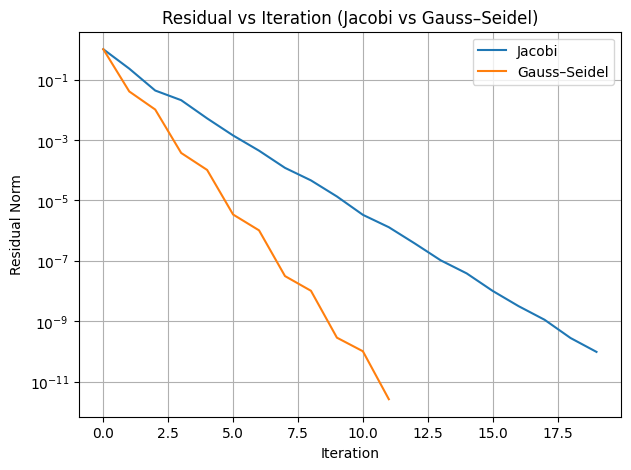

In [455]:
from matplotlib import pyplot as plt


plt.figure(figsize=(7,5))

plt.semilogy(res_j, label="Jacobi")
plt.semilogy(res_g, label="Gauss–Seidel")

plt.xlabel("Iteration")
plt.ylabel("Residual Norm")
plt.title("Residual vs Iteration (Jacobi vs Gauss–Seidel)")
plt.grid(True)
plt.legend()
plt.show()

A6. Matrix Exponential Applications

• Compute etC for t ∈ {0.1, 0.5, 1.0, 2.0}

• Verify property: eCe−C = I

• Solve differential equation: dx/dt = Cx, x(0) = [1, 1, 1]T

• Solution: x(t) = etCx(0)

• Plot solution components over time


In [ ]:
ts = [0.1, 0.5, 1.0, 2.0]
exp_tC = {t: expm(t * C) for t in ts}

for t in ts:
    print(f"e^{t}C =\n", exp_tC[t], "\n")

e^0.1C =
 [[1.01693853e+12 2.33563438e+12 2.33151354e+12]
 [1.28422261e+12 2.94951407e+12 2.94431014e+12]
 [7.03522268e+11 1.61580151e+12 1.61295070e+12]] 

e^0.5C =
 [[9.85475240e+62 2.26337168e+63 2.25937833e+63]
 [1.24448977e+63 2.85825841e+63 2.85321549e+63]
 [6.81755840e+62 1.56580987e+63 1.56304726e+63]] 

e^1.0C =
 [[5.32824871e+126 1.22375548e+127 1.22159636e+127]
 [6.72868352e+126 1.54539770e+127 1.54267110e+127]
 [3.68610446e+126 8.46599092e+126 8.45105409e+126]] 

e^2.0C =
 [[1.55762186e+254 3.57743863e+254 3.57112683e+254]
 [1.96701488e+254 4.51770434e+254 4.50973360e+254]
 [1.07756923e+254 2.47488681e+254 2.47052029e+254]] 



In [ ]:
P = np.random.randint(0,3,9).reshape(3,3)
E = expm(P)
E_inv = expm(-P)
print(E)
print(E_inv)
print(I)

check_identity = E @ E_inv
print(check_identity)
np.allclose(check_identity, np.eye(3))

[[6.43767754 4.92941437 8.71844501]
 [6.43767754 5.29729381 8.35056557]
 [6.0697981  4.92941437 9.08632445]]
[[ 2.56394767 -0.66712369 -1.84703691]
 [-2.87261598  2.05115814  0.87124491]
 [-0.15433416 -0.66712369  0.87124491]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1.00000000e+00 2.80549285e-14 5.12057154e-14]
 [3.35170695e-14 1.00000000e+00 5.08186108e-14]
 [3.25837107e-14 2.98770472e-14 1.00000000e+00]]


True

In [ ]:
ts = [0.1, 0.5, 1.0, 2.0]
exp_tC = {t: expm(t * C) for t in ts}

for t in ts:
    print(f"e^{t}C =\n", exp_tC[t], "\n")

e^0.1C =
 [[1.01693853e+12 2.33563438e+12 2.33151354e+12]
 [1.28422261e+12 2.94951407e+12 2.94431014e+12]
 [7.03522268e+11 1.61580151e+12 1.61295070e+12]] 

e^0.5C =
 [[9.85475240e+62 2.26337168e+63 2.25937833e+63]
 [1.24448977e+63 2.85825841e+63 2.85321549e+63]
 [6.81755840e+62 1.56580987e+63 1.56304726e+63]] 

e^1.0C =
 [[5.32824871e+126 1.22375548e+127 1.22159636e+127]
 [6.72868352e+126 1.54539770e+127 1.54267110e+127]
 [3.68610446e+126 8.46599092e+126 8.45105409e+126]] 

e^2.0C =
 [[1.55762186e+254 3.57743863e+254 3.57112683e+254]
 [1.96701488e+254 4.51770434e+254 4.50973360e+254]
 [1.07756923e+254 2.47488681e+254 2.47052029e+254]] 



In [456]:
import numpy as np
x0 = np.random.randn(8,1)    # initial vector of length 8

def x_of_t(t):
    return expm(t * C) @ x0


times = np.linspace(0, 2, 50)
solutions = np.array([x_of_t(t) for t in times])

print(solutions.shape)  # (50, 8)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 3)

In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(times, solutions[:,0], label='x1(t)')
plt.plot(times, solutions[:,1], label='x2(t)')
plt.plot(times, solutions[:,2], label='x3(t)')
plt.plot(times, solutions[:,3], label='x3(t)')
plt.plot(times, solutions[:,4], label='x3(t)')
plt.plot(times, solutions[:,5], label='x3(t)')
plt.plot(times, solutions[:,6], label='x3(t)')
plt.plot(times, solutions[:,7], label='x3(t)')
plt.xlabel("t")
plt.ylabel("Solution components")
plt.title("Solution of dx/dt = Cx")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'solutions' is not defined

solutions is a 2D array of shape (50, 3) (50 time points × 3 components).solutions[:,0] selects the first component 
x1(t) for all times.Similarly, solutions[:,1] is x2(t) and solutions[:,2] is x3(t).
plt.plot(x, y, label='...') plots y vs x and assigns a label for the legend.

A7. Generalized Eigenvalue Problem

• Create symmetric positive-definite matrix M

• Solve generalized eigenvalue problem: Cv = λMv

• Verify M-orthogonality: vTi Mvj = δij

• Transform to standard eigenvalue problem

• Compare eigenvalues with standard problem

In [ ]:
import numpy as np

# Choose your dimension
n = 5  # change to match your requirement

# Create an SPD matrix M (so Cholesky exists)
A = np.random.randn(n, n)
M = A.T @ A + np.eye(n)  # SPD

# Create a matrix C with matching dimension
C = np.random.randn(n, n)

try:
    L = np.linalg.cholesky(M)
    L_inv = np.linalg.inv(L)
    A_trans = L_inv @ C @ L_inv.T
    print("A_trans computed successfully:\n", A_trans)

except Exception as e:
    print("Error:", e)


A_trans computed successfully:
 [[-0.20100234  0.17425848 -0.08688189 -0.32708236 -0.07911202]
 [ 0.18291936 -0.10959888  0.07434062  0.12523542 -0.00886656]
 [-0.12225361 -0.03177688 -0.09017803 -0.26900346  0.11252787]
 [-0.21798238 -0.10666684  0.07245242 -0.36052806  0.03973268]
 [ 0.12235749  0.089989    0.17473249 -0.12716428  0.20067794]]


In [ ]:
eigvals, eigvecs_y = np.linalg.eigh(A_trans)
eigvals

array([-0.51571   , -0.35790409, -0.20895728,  0.15250078,  0.36944122])

In [ ]:
eigvecs_v = np.linalg.solve(L.T, eigvecs_y)
eigvecs_v

array([[ 0.5105238 , -0.11474051, -0.30980876, -0.0300791 ,  0.2200004 ],
       [-0.06780369,  0.19217094,  0.29249174, -0.32581858,  0.03538456],
       [ 0.09228333, -0.20128042,  0.28136081,  0.27100568, -0.04823105],
       [ 0.25826496,  0.10633983,  0.06630219,  0.06264493, -0.15389403],
       [ 0.03315563,  0.19512867, -0.2137038 ,  0.23062355,  0.50668072]])

In [ ]:
Mnorms = np.sqrt(np.sum(eigvecs_v * (M @ eigvecs_v), axis=0))
eigvecs_v = eigvecs_v / Mnorms
eigvecs_v

array([[ 0.5105238 , -0.11474051, -0.30980876, -0.0300791 ,  0.2200004 ],
       [-0.06780369,  0.19217094,  0.29249174, -0.32581858,  0.03538456],
       [ 0.09228333, -0.20128042,  0.28136081,  0.27100568, -0.04823105],
       [ 0.25826496,  0.10633983,  0.06630219,  0.06264493, -0.15389403],
       [ 0.03315563,  0.19512867, -0.2137038 ,  0.23062355,  0.50668072]])

A8. Kronecker Products and Vectorization

• Compute Kronecker product: K = A ⊗ B

• Verify properties: rank(A ⊗ B) = rank(A) · rank(B)

• Solve linear system using vectorization: vec(AXB) = (BT ⊗ A)vec(X)

• Compute eigenvalues of A ⊗ B from eigenvalues of A and B

In [ ]:
K = np.kron(A,B)
K

array([[ 5,  0,  1],
       [10,  0,  2],
       [15,  0,  3],
       [ 0,  7,  5],
       [ 0, 14, 10],
       [ 0, 21, 15],
       [ 6,  1,  6],
       [12,  2, 12],
       [18,  3, 18]])

In [ ]:
A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)
K_rank = np.linalg.matrix_rank(K)
K_rank == A_rank*B_rank

np.True_

This proves Rank( A cross B) = rank(A)*rank(B)

In [ ]:


# All matrices 3x3
A = np.random.randn(3,3)
B = np.random.randn(3,3)

X_true = np.random.randint(-1, 4, 9).reshape(3,3)

try:
    C = A @ X_true @ B
    print("C computed successfully:\n", C)

except Exception as e:
    print("Error:", e)


# vec(C) in column-major (Fortran) order
vecC = C.reshape(-1, order='F')

# Build M = (B^T ⊗ A)
M = np.kron(B.T, A)

# Solve M vec(X) = vec(C)
vecX = np.linalg.solve(M, vecC)

# Reshape back into 3×3 matrix
X_rec = vecX.reshape(X_true.shape, order='F')
X_rec

C computed successfully:
 [[ 0.2583917  -3.7686585  -3.42026434]
 [-0.34894104  3.99136505  3.30495314]
 [-0.12466806  1.26672708  0.99016258]]


array([[ 3.00000000e+00,  2.00000000e+00,  2.00000000e+00],
       [ 2.30931344e-16, -3.06531784e-16, -1.26091130e-15],
       [ 2.00000000e+00,  1.00000000e+00,  1.00000000e+00]])

In [ ]:
eigA = np.linalg.eig(A)[0]
eigB = np.linalg.eig(B)[0]
eigK = np.linalg.eig(K)[0]

NameError: name 'np' is not defined

In [ ]:
pairwise = np.kron(eigA, eigB)
np.allclose(sorted(pairwise),sorted(eigK))

NameError: name 'eigK' is not defined

Calculated all eigen values even K for checking if the value matches. Then Pairwise product by using kronecker prodcut for calculating the eigen vlaues

A9. Matrix Sensitivity Analysis

• Perturb C by adding small random noise: C˜ = C + ϵE

• Use ϵ = 10−6 and random matrix E with ||E|| = 1

• Compute relative error in eigenvalues

• Compute relative error in determinant

• Analyze relationship between condition number and sensitivity


In [ ]:
eps = 1e-6

E = np.random.randn(*C.shape)
E = E / np.linalg.norm(E, 'fro')

C_tilde = C + eps * E
C_tilde

Here E is the random noise with frobenius norm 1

In [ ]:
eig_C = np.linalg.eigvals(C)
eig_Ctilde = np.linalg.eigvals(C_tilde)

In [ ]:
rel_err_eigs = np.abs(eig_Ctilde - eig_C) / np.abs(eig_C)
print("Relative eigenvalue errors:\n", rel_err_eigs)

In [ ]:
maximum_rel_error = max(rel_err_eigs)
maximum_rel_error

In [ ]:
det_C = np.linalg.det(C)
det_Ctilde = np.linalg.det(C_tilde)

rel_det_err = np.abs(det_Ctilde - det_C) / np.abs(det_C)
print("Relative determinant error:", rel_det_err)

In [ ]:
cond_C = np.linalg.cond(C)
print("Condition number of C:", cond_C)

Interpretation (you add this in your report):

Matrices with large condition number have eigenvalues and determinant that are highly sensitive to tiny perturbations.

If cond(C) is large, even ε = 1e−6 noise can cause large relative errors.

If cond(C) is small, C is well-conditioned and errors stay ≈ ε.

Here C is in the range of 10-10^2 so it is well conditioned that is why the noise did not cause big errors

A10. Advanced Visualization and Analysis

• Create heatmap of matrix C using Matplotlib

• Visualize eigenvalue distribution in complex plane

• Plot singular value decay

• Create 3D visualization of matrix transformation: y = Cx

• Animate matrix power sequence: C, C2, C3, . . . , C10


In [ ]:
np.random.seed(0)
A = np.random.randn(8, 8)
C = (A + A.T) / 2

plt.figure(figsize=(6,5))
plt.imshow(C, cmap= 'coolwarm',interpolation='nearest')
plt.title("Heatmap of matrix C")
plt.colorbar()
plt.xlabel("column")
plt.ylabel("row")
plt.show()

NameError: name 'np' is not defined

In [ ]:
eigvals = np.linalg.eigvals(C) 

plt.figure(figsize=(5,5))
plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.scatter(eigvals.real, eigvals.imag)
plt.title("Eigenvalue distribution (complex plane)")
plt.xlabel("Real part")
plt.ylabel("Imag part")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

In [ ]:
U, s, Vt = np.linalg.svd(C, full_matrices=False)
plt.figure(figsize=(6,4))
plt.semilogy(np.arange(1, len(s)+1), s, marker='o')
plt.title("Singular value decay")
plt.xlabel("Index")
plt.ylabel("Singular value)")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()